In [92]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import multivariate_normal
from sklearn.metrics import silhouette_score

In [93]:
df = pd.read_csv('Clustering_gmm (2).csv')

In [94]:
df.head()

,Weight,Height
0,67.062924,176.086355
1,68.804094,178.388669
2,60.930863,170.284496
3,59.733843,168.691992
4,65.431230,173.763679


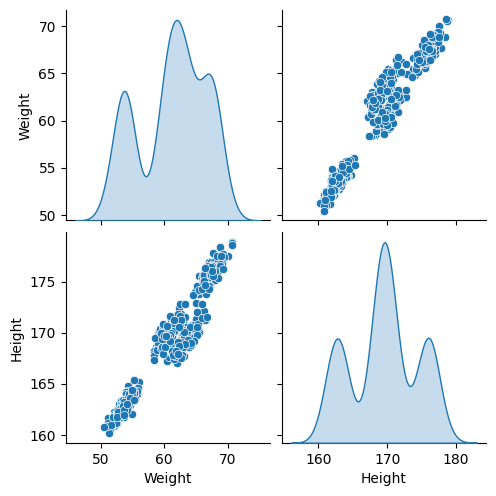

In [95]:
sns.pairplot(df, diag_kind='kde')
plt.show()

In [96]:
df.isnull().sum()

Weight    0
Height    0
dtype: int64

In [97]:
df.duplicated().sum()

0

In [98]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df = pd.DataFrame(df_scaled, columns=df.columns)

In [99]:
df.head()

,Weight,Height
0,1.115742,1.368788
1,1.451113,1.848408
2,-0.065368,0.160139
3,-0.295929,-0.171612
4,0.801458,0.884926


In [100]:
class K_Means:
    
    def __init__(self, k=2, tolerance=0.001, max_iter=500):
        self.k = k
        self.max_iterations = max_iter
        self.tolerance = tolerance
    
    def euclidean_distance(self, point1, point2):
        return np.linalg.norm(point1 - point2, axis=0)
        
    def predict(self, data):
        distances = [np.linalg.norm(data - self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification
    
    def fit(self, data):
        self.centroids = {}
        for i in range(self.k):
            self.centroids[i] = data[i]
        
        for i in range(self.max_iterations):
            self.classes = {} 
            for j in range(self.k):
                self.classes[j] = []
                
            for point in data:
                distances = [self.euclidean_distance(point, self.centroids[index]) for index in self.centroids]
                cluster_index = distances.index(min(distances))
                self.classes[cluster_index].append(point)
            
            previous = np.copy(list(self.centroids.values()))
            for cluster_index in self.classes:
                self.centroids[cluster_index] = np.average(self.classes[cluster_index], axis=0)
            
            
            # stop condition 
            # Check if converged
            if np.linalg.norm(list(self.centroids.values()) - previous) < self.tolerance:
                print(f"Converged at iteration {i}")
                break

Converged at iteration 1
Converged at iteration 17
Converged at iteration 7
Converged at iteration 27
Converged at iteration 20
Converged at iteration 20
Converged at iteration 7
Converged at iteration 12
Converged at iteration 15


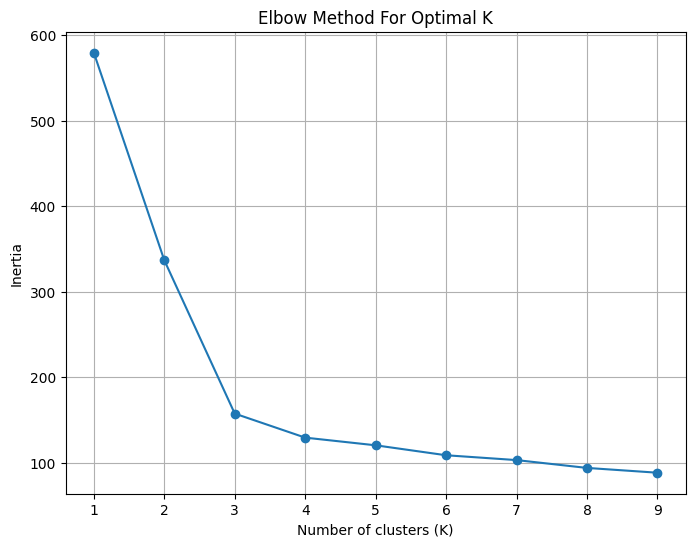

In [101]:
# Elbow Method to find optimal K
inertia = []
K_range = range(1, 10)

for k in K_range:
    k_means = K_Means(k)
    k_means.fit(df.values)
    inertia.append(sum(np.min([np.linalg.norm(point - k_means.centroids[cluster]) for cluster in k_means.centroids]) for point in df.values))

plt.figure(figsize=(8, 6))
plt.plot(K_range, inertia, 'o-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal K')
plt.grid()
plt.show()

In [102]:
K = 3
k_means = K_Means(K)
k_means.fit(df.values)

# Predict cluster labels
labels = [k_means.predict(point) for point in df.values]

Converged at iteration 7


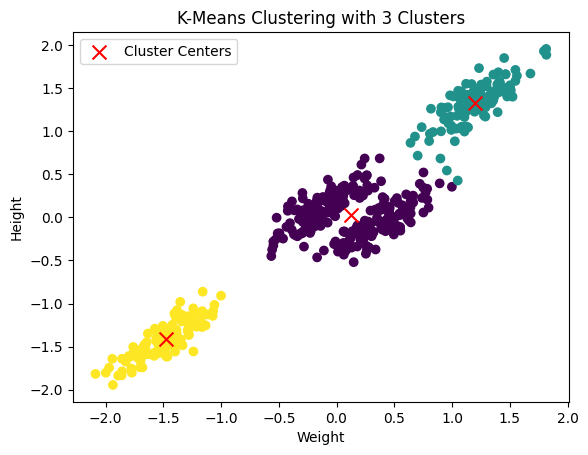

In [103]:
# Visualize the results
plt.scatter(df.values[:, 0], df.values[:, 1], c=labels, cmap='viridis')
plt.scatter([k_means.centroids[i][0] for i in range(K)],
            [k_means.centroids[i][1] for i in range(K)], marker='x', s=100, color='red', label='Cluster Centers')

plt.title(f'K-Means Clustering with {K} Clusters')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.legend()
plt.show()

In [104]:
# Calculate silhouette score
kmeans_silhouette_score = silhouette_score(df, labels)
print(f"K-Means Silhouette Score: {kmeans_silhouette_score}")

K-Means Silhouette Score: 0.7356847709879414
